# Introduction to Statistics in Python
https://www.scipy-lectures.org/packages/statistics/index.html

## Importing and Exploring our Data

In [23]:
#import pandas and use magic function for plotting
import pandas as pd
%matplotlib inline

In [25]:
# import our data using pandas read_csv() function where 
# delimiter = ';', index_col = 0, na_values = '.'
data = pd.read_csv('https://www.scipy-lectures.org/_downloads/brain_size.csv',
                  delimiter=';', index_col=0, na_values='.')

In [26]:
# check out our data using pandas df.head() function
data.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,Female,133,132,124,118.0,64.5,816932
2,Male,140,150,124,NaN,72.5,1001121
3,Male,139,123,150,143.0,73.3,1038437
4,Male,133,129,128,172.0,68.8,965353
5,Female,137,132,134,147.0,65.0,951545


In [29]:
data.describe()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


In [30]:
# how many observations do we have? use pandas df.shape attribute
data.shape

(40, 7)

In [32]:
# check out one column with df['column name'] or df.column_name
#data['Gender']
data.Gender

1     Female
2       Male
3       Male
4       Male
5     Female
6     Female
7     Female
8     Female
9       Male
10      Male
11    Female
12      Male
13      Male
14    Female
15    Female
16    Female
17    Female
18      Male
19    Female
20      Male
21      Male
22      Male
23    Female
24      Male
25    Female
26      Male
27    Female
28      Male
29    Female
30    Female
31    Female
32      Male
33      Male
34      Male
35    Female
36    Female
37      Male
38    Female
39      Male
40      Male
Name: Gender, dtype: object

In [34]:
# make a groupby object on the dataframe
data_grouped = data.groupby("Gender")


In [44]:
# look at mean weight per group in data_grouped
data_grouped['Height'].min()

Gender
Female    62.0
Male      66.3
Name: Height, dtype: float64

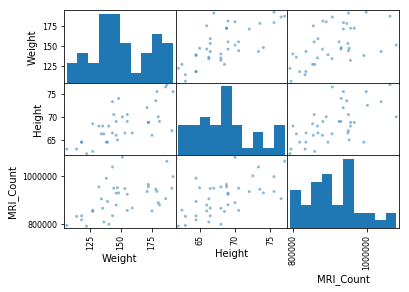

In [46]:
# import plotting from pandas
from pandas import plotting

# take a look at our data distributions and pair-wise correlations 
# using plotting.scatter_matrix() on Weight, Height, and MRI_Count
plotting.scatter_matrix(data[['Weight', 'Height', 'MRI_Count']]);

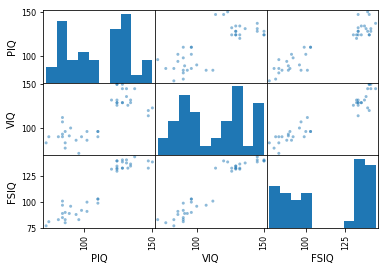

In [47]:
# scatter_matrix on PIQ VIQ FSIQ
plotting.scatter_matrix(data[['PIQ', 'VIQ', 'FSIQ']]);

### Plotting and Comparing Distributions

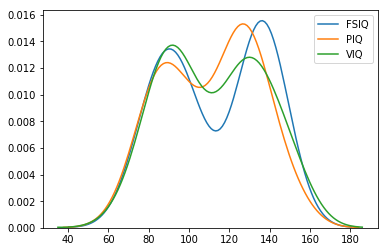

In [51]:
# import seaborn plotting package
import seaborn as sns

# use the kdeplot() function on FSIQ, PIQ and VIQ
sns.kdeplot(data['FSIQ']);
sns.kdeplot(data['PIQ']);
sns.kdeplot(data['VIQ']);

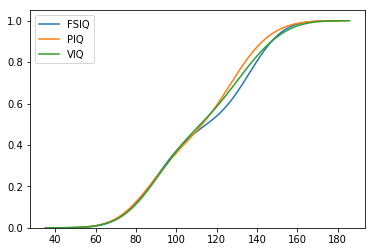

In [52]:
sns.kdeplot(data['FSIQ'], cumulative=True);
sns.kdeplot(data['PIQ'], cumulative=True);
sns.kdeplot(data['VIQ'], cumulative=True);

# cumulative = True


## Hypothesis Testing

In [53]:
# import stats from scipy 
from scipy import stats

### 1-sample t-test: Testing the value of a population mean. 

`scipy.stats.ttest_1samp()` tests if the population mean of data is likely to be equal to a given value (technically if observations are drawn from a Gaussian distributions of given population mean). It returns the T statistic, and the p-value (see the function’s help)

In [54]:
# run a 1 sample t-test on VIQ against 0
stats.ttest_1samp(data['VIQ'], 0)

Ttest_1sampResult(statistic=30.088099970849328, pvalue=1.3289196468728067e-28)

### 2-sample t-test: testing for difference across populations
We have seen above that the mean VIQ in the male and female populations were different.  
To test if this is significant, we do a 2-sample t-test with scipy.stats.ttest_ind()

In [55]:
# set up two series for female and male VIQ
female = data[data.Gender == 'Female']['VIQ']
male = data[data.Gender == 'Male']['VIQ']


In [56]:
# use stats.ttest_ind() on the two series
stats.ttest_ind(female, male)

Ttest_indResult(statistic=-0.7726161723275011, pvalue=0.44452876778583217)

###  Paired tests: repeated measurements on the same indivuals

The PIQ, VIQ and FSIQ are three different measures of IQ in the same individual.   
We can first look if FSIQ and PIQ are different using the 2-sample t-test.

In [57]:
# run a 2-sample t-test on FSIQ and PIQ
stats.ttest_ind(data['FSIQ'], data['PIQ'])

Ttest_indResult(statistic=0.465637596380964, pvalue=0.6427725009414841)

However this doesn't account for individual differences contributing to variance in data.  
We can use a **paired t-test** or **repeated measures test** to account for these individual differences.

In [60]:
# use the ttest_rel() to do a paired t-test on FSIQ and PIQ
stats.ttest_rel(data['FSIQ'], data['PIQ'])

Ttest_relResult(statistic=1.7842019405859857, pvalue=0.08217263818364236)

This is actually equivalent to doing a 1-sample t-test on the difference of the two measures.

In [61]:
# 1-sample ttest on the difference
stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0)

Ttest_1sampResult(statistic=1.7842019405859857, pvalue=0.08217263818364236)

These tests assume normality in the data. A non-parametric alternative is the Wilcoxian signed rank test

In [62]:
# for a non-parametric version of this test, use stats.wilcoxon()
stats.wilcoxon(data['FSIQ'], data['PIQ'])

WilcoxonResult(statistic=274.5, pvalue=0.10659492713506856)

Note: 
The corresponding test in the non paired case is the Mann–Whitney U test, `scipy.stats.mannwhitneyu()`. 

## Linear models, multiple factors, and analysis of variance

Given two set of observations, x and y, we want to test the hypothesis that y is a linear function of x.
We will use the statsmodels module to:

1. Fit a linear model. We will use the simplest strategy, ordinary least squares (OLS).
2. Test that coef is non zero.


In [65]:
# Let's simulate some data according to the model
# import numpy
import numpy as np
# create range of 20 x values over -5 to 5 using np.linspace()
x = np.linspace(-5,5,20)
# set random seed to 1
np.random.seed(1)
# normal distributed noise of y = -5 + 3x + 4 * np.random.normal(size=x.shape)
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)
# Create a DataFrame named sim_data containing all the relevant variables
fake_data = pd.DataFrame({"x": x, "y": y})

In [66]:
# import ols from statsmodels.formmula.api
from statsmodels.formula.api import ols

# Specify an OLS model (y ~ x) and fit it using the .fit() method 
model = ols('y ~ x', fake_data).fit()

In [68]:
# Inspect the results of the model using model.summary()
model.summary()
print(model.params)

Intercept   -5.533459
x            2.936888
dtype: float64


In [ ]:
# Retrieve the model params, note tab completion


### Categorical variables: comparing groups or multiple categories

In [69]:
# remind ourselves of our data using head()
data.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,Female,133,132,124,118.0,64.5,816932
2,Male,140,150,124,NaN,72.5,1001121
3,Male,139,123,150,143.0,73.3,1038437
4,Male,133,129,128,172.0,68.8,965353
5,Female,137,132,134,147.0,65.0,951545


In [70]:
# We can write a comparison between VIQ of male and female 
# (VIQ ~ Gender) using a linear model:
model = ols("VIQ ~ Gender", data).fit()

# ols automatically detects Gender as categorical
# model = ols('VIQ ~ C(Gender)', data).fit()

# view results of the model using .summary()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Thu, 06 Dec 2018   Prob (F-statistic):              0.445
Time:                        18:51:58   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.619      0.000      98.704     120.196
Gender[T.Male]     5.8000      7.507      0.773      0.445      -9.397      20.997
==============================================================================
Omnibus:                       26.188   Durbin-Watson:                   1.709
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                3.703
Skew:                           0.010   Prob(JB):                        0.157
Kurtosis:                       1.510   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Multiple Regression: including multiple factors

In [ ]:
# read in our iris data https://www.scipy-lectures.org/_downloads/iris.csv


In [ ]:
# use seaborns pairplot() function and hue='name', use ; to remove output


Sepal and petal size tend to be related: bigger flowers are bigger!  
But is there in addition a systematic effect of species?

In [ ]:
# let's make a model that takes into account this potential interaction of name (sepal_width ~ name + petal_length)


# view the results of the model


### Analysis of Variance (ANOVA)
#### 1-Way Anova

In [71]:
# remind ourselves of our iris data
iris = pd.read_csv("https://www.scipy-lectures.org/_downloads/iris.csv")

In [72]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


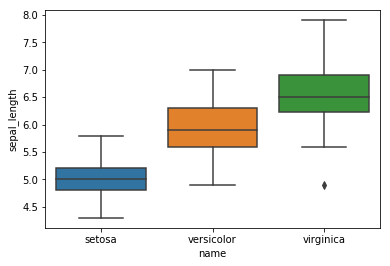

In [74]:
# let's visualize the difference species and their sepal_length in 
# a box plot using seaborns box_plot()
sns.boxplot(x="name", y="sepal_length", data=iris);

In [76]:
# we need to split our data to run an anova using stats.f_oneway()
# make a variable for setosa, versicolor and virginica on sepal_length
setosa = iris[iris['name'] == 'setosa']['sepal_length']
versicolor = iris[iris['name'] == 'versicolor']['sepal_length']
virginica = iris[iris['name'] == 'virginica']['sepal_length']

In [78]:
# use stats.f_oneway() on the series you made for each species and 
# get an f_value and p_value
f_value, p_value = stats.f_oneway(setosa, versicolor, virginica)

# print the results
print(f_value, p_value)

119.26450218450468 1.6696691907693826e-31


In [82]:
# another way to do it that prevents having to split your data
# import sm from statsmodels.api and import ols from statsmodels.formula.api
import statsmodels.api as sm
from statsmodels.formula.api import ols

# specify the model (sepal_length ~ name) and fit
model = ols('sepal_length ~ name', iris).fit()

# make an aov table using sm.stats.anova_lm() using type=2 since we don't have an interaction term
aov_table = sm.stats.anova_lm(model, typ=2)

# print the aov_table
print(aov_table)

             sum_sq     df           F        PR(>F)
name      63.212133    2.0  119.264502  1.669669e-31
Residual  38.956200  147.0         NaN           NaN


In [83]:
model = ols('FSIQ ~ Gender + MRI_Count + Gender:MRI_Count', data).fit()

In [84]:
aov_table = sm.stats.anova_lm(model, typ=1)


In [85]:
print(aov_table)

                    df        sum_sq      mean_sq         F    PR(>F)
Gender             1.0     96.100000    96.100000  0.187565  0.667535
MRI_Count          1.0   3864.000366  3864.000366  7.541622  0.009353
Gender:MRI_Count   1.0    212.959469   212.959469  0.415647  0.523205
Residual          36.0  18444.840165   512.356671       NaN       NaN
